In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Visualization
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#EDA
from collections import Counter
from pydantic_settings import BaseSettings
import ydata_profiling as pp
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [12]:
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')

In [13]:
#import dataset
heart_df = pd.read_csv(r'C:\Users\ethan\Downloads\heart_disease_health_indicators_BRFSS2015.csv')

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming 'heartdisease' is your target variable
x = heart_df.drop('HeartDiseaseorAttack', axis=1)
y = heart_df['HeartDiseaseorAttack']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the linear regression model
model = LinearRegression()

# Perform Recursive Feature Elimination (RFE) to select features
rfe = RFE(model, n_features_to_select=5)  # Adjust the number of features as needed
rfe.fit(x_train_scaled, y_train)

selected_features = x.columns[rfe.support_]

# Train the model with the selected features
model.fit(x_train_scaled[:, rfe.support_], y_train)

# Predict on the test set
y_pred = model.predict(x_test_scaled[:, rfe.support_])

# Evaluate the model
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test_scaled.shape[1] - 1)
mse = mean_squared_error(y_test, y_pred)
aic = len(y_test) * np.log(mse) + 2 * x_test_scaled.shape[1]
bic = len(y_test) * np.log(mse) + x_test_scaled.shape[1] * np.log(len(y_test))

print(f"Selected features: {selected_features}")
print(f"Adjusted R^2: {adj_r2}")
print(f"R^2: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")

Selected features: Index(['Stroke', 'GenHlth', 'DiffWalk', 'Sex', 'Age'], dtype='object')
Adjusted R^2: 0.13520474697142715
R^2: 0.1355626990816785
Mean Squared Error: 0.07360255740567775
AIC: -132332.05489733905
BIC: -132146.53268640672


In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
x = heart_df[['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']]
y = heart_df['HeartDiseaseorAttack']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize logistic regression model (or any other estimator)
estimator = LogisticRegression()

# Initialize RFE with the estimator and number of desired features to keep
rfe = RFE(estimator, n_features_to_select=15)  # Adjust 'n_features_to_select' as needed

# Fit RFE to the training data
rfe.fit(x_train_scaled, y_train)

# Get the selected features
selected_features = x_train.columns[rfe.support_]

# Filter X_train and X_test to include only selected features
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

# Train a model using selected features (e.g., logistic regression)
model = LogisticRegression()  # You can replace this with any other model
model.fit(x_train_selected, y_train)

# Evaluate the model on the test set
accuracy = model.score(x_test_selected, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9073438978240302


              Feature  Importance
18                Age    0.177615
15           PhysHlth    0.171278
20             Income    0.165139
14           MentHlth    0.131204
19          Education    0.102104
13            GenHlth    0.098714
0              HighBP    0.035975
16           DiffWalk    0.033568
17                Sex    0.032317
12        NoDocbcCost    0.016371
8              Fruits    0.005667
7        PhysActivity    0.004715
6            Diabetes    0.004070
3                 BMI    0.003626
4              Smoker    0.003532
2           CholCheck    0.003188
9             Veggies    0.002886
1            HighChol    0.002743
10  HvyAlcoholConsump    0.002720
11      AnyHealthcare    0.001417
5              Stroke    0.001153


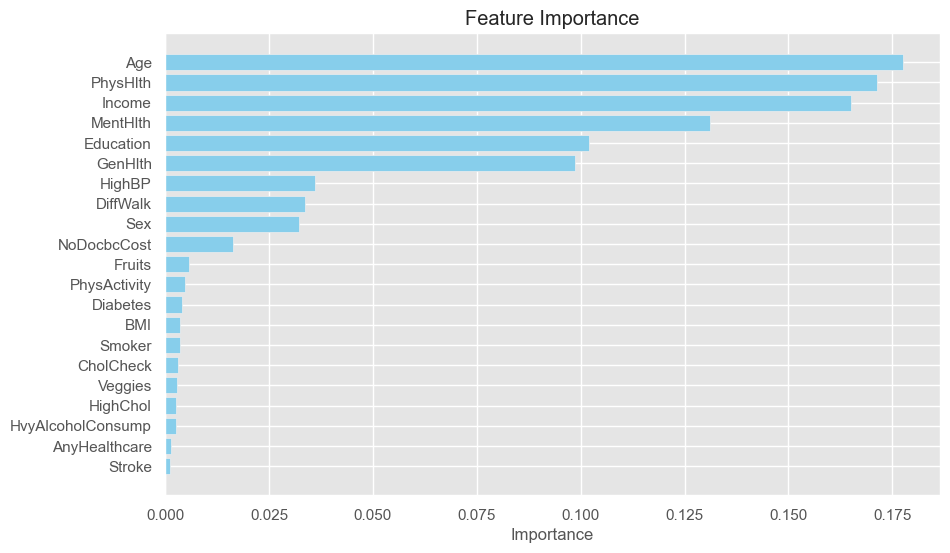

In [40]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
x = heart_df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
y = heart_df['HeartDiseaseorAttack']

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(x, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importance_df)

import matplotlib.pyplot as plt

# Assuming 'feature_importance_df' contains the DataFrame with feature importances
# You can use the code snippet from the previous response to create 'feature_importance_df'

# Plotting the feature importances as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

log_reg_model = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(x_train, y_train)
lr_predicted = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predicted)
lr_acc_score = accuracy_score(y_test, lr_predicted)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predicted))

print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,lr_predicted)*100,"%")

confusion matrix
[[45381   587]
 [ 4124   644]]


Accuracy of Logistic Regression: 90.71467991169978 

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45968
         1.0       0.52      0.14      0.21      4768

    accuracy                           0.91     50736
   macro avg       0.72      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736

Training accuracy score of the model is: 90.59198596657207 %
Testing accuracy score of the model is: 90.71467991169978 %


AttributeError: 'LogisticRegression' object has no attribute 'LogisticRegression'

In [ ]:

regr = model.LogisticRegression()
regr.fit(z, y)

aic_intercept_slope = aic(y, regr.coef_[0] * x.as_matrix() + regr.intercept_, k=1)

def aic(y, y_pred, k):
   resid = y - y_pred.ravel()
   sse = sum(resid ** 2)

   AIC = 2*k - 2*np.log(sse)

return AIC

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame 'data' with predictor variables
# Select numerical predictor variables (assuming they are already encoded)
numerical_vars = heart_df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = numerical_vars.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_vars.values, i) for i in range(numerical_vars.shape[1])]

# Display VIF values
print(vif_data)

             Variable           VIF
0              HighBP  2.240983e+00
1            HighChol  2.370316e+14
2           CholCheck  2.370316e+14
3                 BMI  2.370316e+14
4              Smoker  2.370316e+14
5              Stroke  2.370316e+14
6            Diabetes  2.370316e+14
7        PhysActivity  2.370316e+14
8              Fruits  2.370316e+14
9             Veggies  2.370316e+14
10  HvyAlcoholConsump  2.370316e+14
11      AnyHealthcare  2.370316e+14
12        NoDocbcCost  1.179087e+00
13            GenHlth  8.664716e+00
14           MentHlth  1.450932e+00
15           PhysHlth  1.971746e+00
16           DiffWalk  1.783354e+00
17                Sex  1.835351e+00
18                Age  8.476899e+00
19          Education  1.986933e+01
20             Income  1.299449e+01


<Axes: >

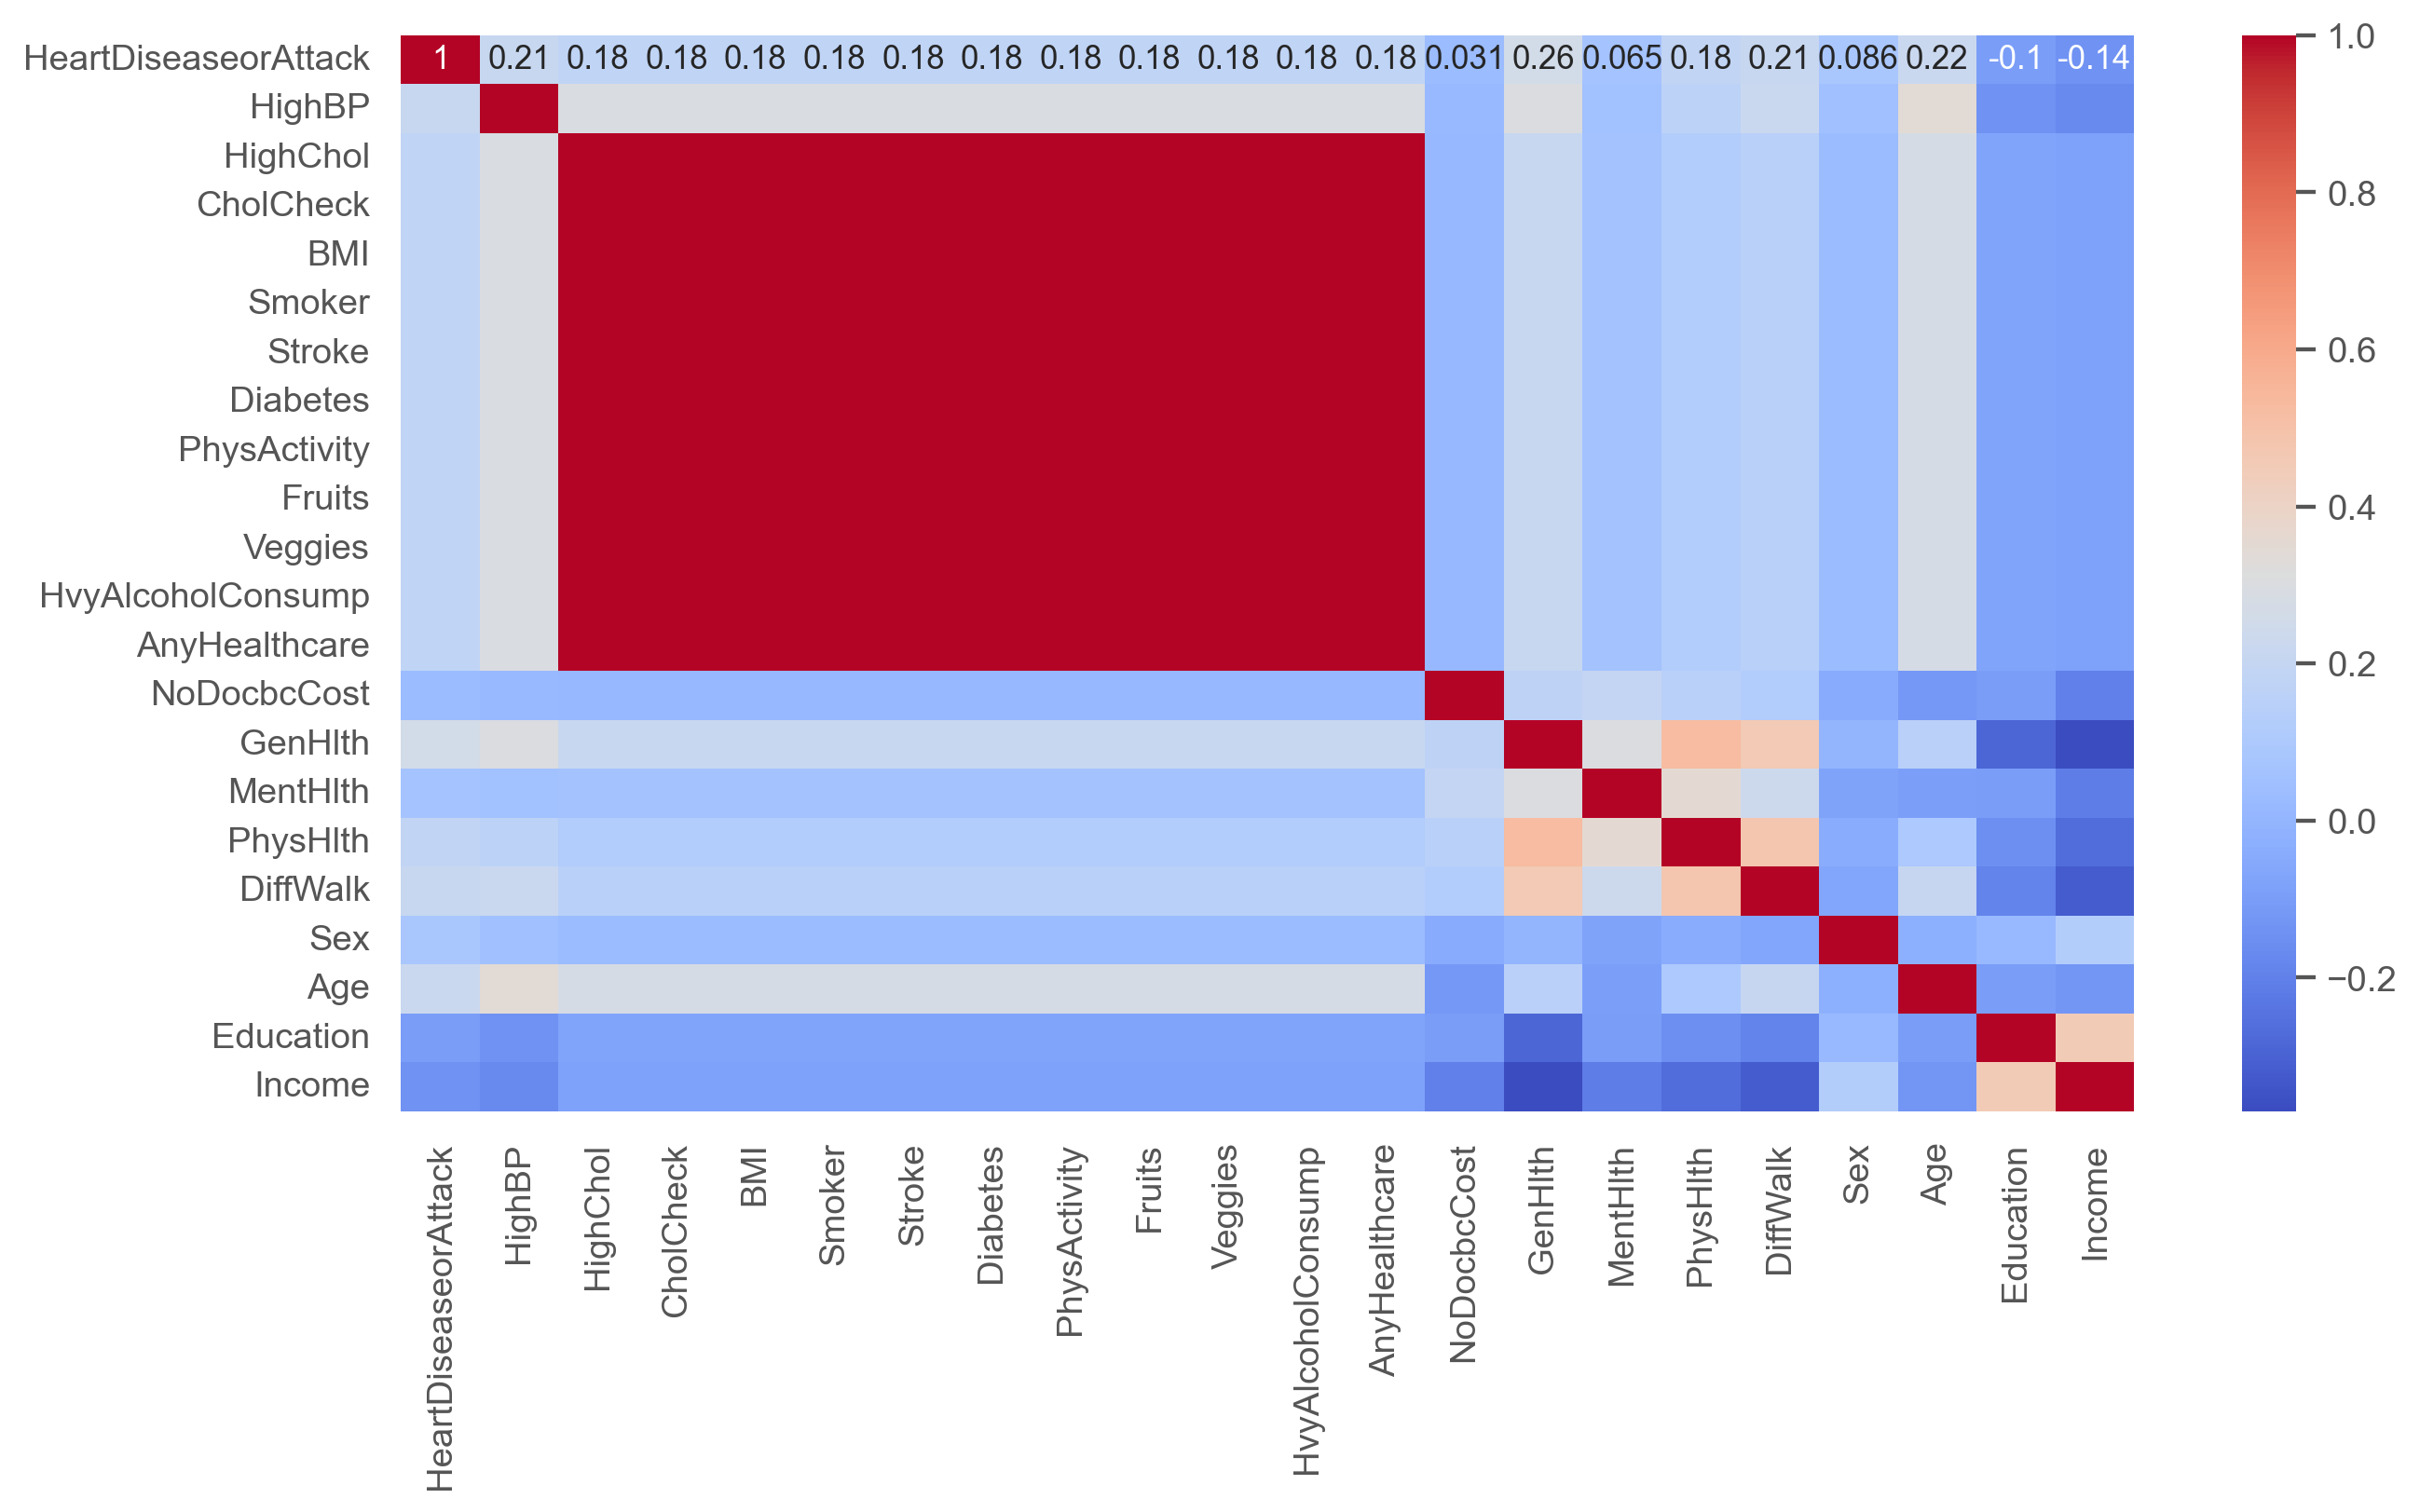

In [27]:
corr_df = heart_df.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=250)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

In [30]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
x = heart_df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
y = heart_df['HeartDiseaseorAttack']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Fit Lasso regression model
lasso = Lasso(alpha=0.01)  # Adjust alpha as needed for regularization strength
lasso.fit(x_train_scaled, y_train)

# Get feature coefficients and identify selected features
lasso_coefs = pd.DataFrame({'Feature': x.columns, 'Coefficient': lasso.coef_})
selected_features = lasso_coefs[lasso_coefs['Coefficient'] != 0]['Feature']

# Filter X_train and X_test to include only selected features
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

# Train a model using selected features (e.g., logistic regression)
# Replace 'YourModel' with the model you want to use, such as LogisticRegression, RandomForestClassifier, etc.
model = LogisticRegression()
model.fit(x_train_selected, y_train)

# Evaluate

LogisticRegression()

In [41]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
x = heart_df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
y = heart_df['HeartDiseaseorAttack']

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Fit the model to the data
log_reg.fit(x, y)

# Get coefficients (weights) for predictor variables
coefficients = log_reg.coef_[0]

# Create a DataFrame to store coefficients and corresponding predictor variables
coefficients_df = pd.DataFrame({'Predictor_Variable': x.columns, 'Coefficient': coefficients})

# Sort coefficients by absolute value (optional)
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Print coefficients
print(coefficients_df)


   Predictor_Variable  Coefficient  Absolute_Coefficient
17                Sex     0.796090              0.796090
0              HighBP     0.610870              0.610870
13            GenHlth     0.551524              0.551524
16           DiffWalk     0.337615              0.337615
18                Age     0.268883              0.268883
12        NoDocbcCost     0.228137              0.228137
9             Veggies     0.061321              0.061321
11      AnyHealthcare     0.061321              0.061321
1            HighChol     0.061321              0.061321
10  HvyAlcoholConsump     0.061321              0.061321
8              Fruits     0.061321              0.061321
7        PhysActivity     0.061321              0.061321
6            Diabetes     0.061321              0.061321
5              Stroke     0.061321              0.061321
4              Smoker     0.061321              0.061321
3                 BMI     0.061321              0.061321
2           CholCheck     0.061

In [58]:
import numpy as np

# Define coefficients obtained from logistic regression model
coefficients = np.array([0.610870, 0.061321, 0.061321, 0.061321, 0.061321, 0.061321, 0.061321, 0.061321, 0.061321, 0.061321, 0.061321, 0.061321, 0.061321, 0.228137, 0.003241, 0.001955, 0.337615, 0.796090, 0.268883, 0.007434, -0.052784])  # Coefficients for predictor variables

# Define logistic function (sigmoid function)
def logistic_function(X, coefficients):
    z = np.dot(X, coefficients)  # Calculate the weighted sum of predictor variables and coefficients
    return 1 / (1 + np.exp(-z))  # Apply the logistic function to get probability

# Example predictor variables for your dataset (should be standardized if necessary)
# Replace this with your actual predictor variable values
user = np.array([1, 1, 0, 40, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 13, 1, 1]),  # Example values for sample 1

# Calculate probability of binary variable occurring for each sample
probabilities = logistic_function(user, coefficients)

# Print probabilities
print(probabilities)

[0.99972052]


In [62]:
print("You have", probabilities*100, "% chance of developing heart disease in the next 10 years.")

You have [99.9720516] % chance of developing heart disease in the next 10 years.


In [64]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

# Assuming you have a DataFrame called 'data' with predictor variables and the target variable 'heart_disease'
# Let's encode the binary variables if they're not already encoded
heart_df['HighBP'] = heart_df['HighBP'].astype(int)
heart_df['HighChol'] = heart_df['HighChol'].astype(int)
heart_df['CholCheck'] = heart_df['HighChol'].astype(int)
heart_df['BMI'] = heart_df['HighChol'].astype(int)
heart_df['Smoker'] = heart_df['HighChol'].astype(int)
heart_df['Stroke'] = heart_df['HighChol'].astype(int)
heart_df['Diabetes'] = heart_df['HighChol'].astype(int)
heart_df['PhysActivity'] = heart_df['HighChol'].astype(int)
heart_df['Fruits'] = heart_df['HighChol'].astype(int)
heart_df['Veggies'] = heart_df['HighChol'].astype(int)
heart_df['HvyAlcoholConsump'] = heart_df['HighChol'].astype(int)
heart_df['AnyHealthcare'] = heart_df['HighChol'].astype(int)
heart_df['NoDocbcCost'] = heart_df['NoDocbcCost'].astype(int)
heart_df['GenHlth'] = heart_df['GenHlth'].astype(int)
heart_df['MentHlth'] = heart_df['MentHlth'].astype(int)
heart_df['PhysHlth'] = heart_df['PhysHlth'].astype(int)
heart_df['DiffWalk'] = heart_df['DiffWalk'].astype(int)
heart_df['Sex'] = heart_df['Sex'].astype(int)
heart_df['Age'] = heart_df['Age'].astype(int)
heart_df['Education'] = heart_df['Education'].astype(int)
heart_df['Income'] = heart_df['Income'].astype(int)

# Add more encoding if needed for other binary variables

# Split the data into training and testing sets
x = heart_df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex' , 'Age', 'Education', 'Income']]  # Add more predictor variables as needed
y = heart_df['HeartDiseaseorAttack']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit logistic regression model
logit_model = sm.Logit(y_train, sm.add_constant(x_train))
result = logit_model.fit()

# Print summary of the logistic regression model
print(result.summary())

# Get predicted probabilities for the test set
y_pred_proba = result.predict(sm.add_constant(x_test))

# Convert probabilities to binary predictions (0 or 1)
y_pred = np.round(y_pred_proba)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Compute other metrics
r_squared = r2_score(y_test, y_pred)
adjusted_r_squared = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
aic = result.aic
bic = result.bic

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Akaike Information Criterion (AIC): {aic}")
print(f"Bayesian Information Criterion (BIC): {bic}")

Optimization terminated successfully.
         Current function value: 0.243610
         Iterations 8


LinAlgError: Singular matrix

In [63]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming 'heartdisease' is your target variable
x = heart_df.drop('HeartDiseaseorAttack', axis=1)
y = heart_df['HeartDiseaseorAttack']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Perform Recursive Feature Elimination (RFE) to select features
rfe = RFE(model, n_features_to_select=22)  # Adjust the number of features as needed
rfe.fit(x_train, y_train)

selected_features = x.columns[rfe.support_]

# Train the model with the selected features
model.fit(x_train[:, rfe.support_], y_train)

# Predict on the test set
y_pred = model.predict(x_test[:, rfe.support_])

# Evaluate the model
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
mse = mean_squared_error(y_test, y_pred)
aic = len(y_test) * np.log(mse) + 2 * x_test.shape[1]
bic = len(y_test) * np.log(mse) + x_test.shape[1] * np.log(len(y_test))

print(f"Selected features: {selected_features}")
print(f"Adjusted R^2: {adj_r2}")
print(f"R^2: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")

InvalidIndexError: (slice(None, None, None), array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True]))